In [3]:
import pandas as pd
import numpy as np

# Census data from IPUMS:

ds172 = pd.read_csv('csv/nhgis_ds172.csv', encoding = 'latin1', usecols=[0,1,5,15,17,20,23,27,28,29,30,31,47])

# dscription of columns in this dataset
# not that much useful info; better one below
print(ds172.shape)
print(ds172.columns)

(74002, 13)
Index(['GIS Join Match Code', 'Data File Year', 'State Code', 'Total', 'Urban',
       'Rural', 'Male', 'Male: 15 to 17 years', 'Male: 18 and 19 years',
       'Male: 20 years', 'Male: 21 years', 'Male: 22 to 24 years', 'Female'],
      dtype='object')


In [4]:
# a function so we can change the giscode to make it compatible with census tract elsewhere

def changeform(giscode):
    st = giscode[1:3]
    county = giscode[4:7]
    tract = giscode[8:]
    return str(st) + str(county) + str(tract)
  
print(changeform("G2905100127200"))

ds172.columns = ['GIS_code', 'census_year','st_code', 'total', 'urban', 'rural', 'male','m_1517', 'm_1819', 
                 'm20', 'm21', 'm_2224', 'female']

ds172 = ds172[ds172['st_code']==29]
ds172.GIS_code = ds172.GIS_code.apply(lambda x: changeform(str(x)))



#ds02.head()

29510127200


In [5]:

# combine the number pf 15 - 24 aged men

adolescentmen = ['m_1517', 'm_1819', 'm20', 'm21', 'm_2224']

ds172['male15_24'] = ds172.m_1517 + ds172.m_1819 + ds172.m20 + ds172.m21 + ds172.m_2224


ds172 = ds172.drop(adolescentmen, axis=1)

# get rid of tracts which have a population of zero
ds172 = ds172[ds172.total != 0]

print(len(ds172))
ds172.head()


1391


,GIS_code,census_year,st_code,total,urban,rural,male,female,male15_24
37508,29001950100,2010,29,3802,0,3802,1944,1858,224
37509,29001950200,2010,29,3019,0,3019,1543,1476,172
37510,29001950300,2010,29,2951,2752,199,1458,1493,447
37511,29001950400,2010,29,3892,2841,1051,1805,2087,246
37512,29001950500,2010,29,7079,5457,1622,3363,3716,909


In [6]:
# more comprehensive set of IPUMS data, organized by CensusTract
# column descriptions below

ds02 = pd.read_csv('csv/nhgis02_ds176.csv',encoding='latin1', usecols=[0,3,8,9,10,11,17,25,26,29,30,31,32,39,40,41,42,43,44,
                                                    48,51,55,71,72,78,79])

ds02 = ds02[ds02['State Code']==29]



print(ds02.columns)
#ds02.head()
#ds172.head()

Index(['GIS Join Match Code', 'State Code', 'Estimates: Total',
       'Estimates: Car, truck, or van',
       'Estimates: Car, truck, or van: Drove alone',
       'Estimates: Car, truck, or van: Carpooled',
       'Estimates: Public transportation (excluding taxicab)',
       'Estimates: Bicycle', 'Estimates: Walked', 'Estimates: Total.1',
       'Estimates: Less than 5 minutes', 'Estimates: 5 to 9 minutes',
       'Estimates: 10 to 14 minutes', 'Estimates: 45 to 59 minutes',
       'Estimates: 60 to 89 minutes', 'Estimates: 90 or more minutes',
       'Estimates: Total.2', 'Estimates: Male',
       'Estimates: Male: Enrolled in school',
       'Estimates: Male: Not enrolled in school',
       'Estimates: Male: Not enrolled in school: High school graduate: Unemployed',
       'Estimates: Male: Not enrolled in school: Not high school graduate: Unemployed',
       'Estimates: Total.3', 'Estimates: Under .50',
       'Estimates: 2.00 and over',
       'Estimates: Median family income in 

In [7]:
ds02.columns = ['GIScode', 'stcode', 'num_workers', 'drivers', 'solodrivers',
               'carpoolers', 'pubtrans', 'cyclists', 'walkers', 'num_commuters', 'under15a', 'under15b', 'under15c',
               'over45a', 'over45b', 'over45c', 'pop16_19','male16_19','inschool_m1619', 'unenrolled_m1619',
               'unemployed_1619a', 'unemployed_1619b', 'pop_povstatus', 'lowest_ratio', 'highest_ratio', 'hh_income' ]

# where under15/ over45 means % of people & minutes commuting to work
# *_ratio is the poverty:income ratio for those w defined pov status
ds02.GIScode = ds02.GIScode.apply(lambda x: changeform(str(x)))


ds02 = ds02[ds02.GIScode.isin(ds172.GIS_code)]
print(ds02.shape)

ds02['dummy'] = np.zeros(len(ds02))


ds02.head()      

(1391, 26)


,GIScode,stcode,num_workers,drivers,solodrivers,carpoolers,pubtrans,cyclists,walkers,num_commuters,...,male16_19,inschool_m1619,unenrolled_m1619,unemployed_1619a,unemployed_1619b,pop_povstatus,lowest_ratio,highest_ratio,hh_income,dummy
37508,29001950100,29,1595,1522,1303,219,0,0,12,1538,...,113,107,6,0,0,3531,134,2192,44273.0,0.0
37509,29001950200,29,1417,1303,1162,141,2,0,3,1309,...,141,119,22,2,8,3206,264,2060,45923.0,0.0
37510,29001950300,29,1399,1071,902,169,0,12,266,1363,...,10,5,5,0,0,3138,815,1007,26333.0,0.0
37511,29001950400,29,1913,1774,1613,161,20,36,22,1872,...,43,33,10,0,0,4061,335,2377,52439.0,0.0
37512,29001950500,29,3012,2765,2454,311,0,67,121,2971,...,103,84,19,0,19,6173,952,3448,60551.0,0.0


In [8]:
# sum column values
combine = {'under15':['under15a','under15b','under15c'],'over45':['over45a','over45b','over45c'],'unemployed_m1619':
           ['unemployed_1619a','unemployed_1619b', 'dummy']}
# dummy because I got lazy and didn't want to have to think about accounting for different length lists
for key in combine:
    vals = combine[key]
    ds02[key] = ds02[vals[0]] + ds02[vals[1]] + ds02[vals[2]]

#for future reference, do a nested for loop:
#for key in combine:
#    for i in vals.length:
#        ds02[key] = ds02[vals[i]]

In [9]:

# now drop the redundancies 
for k in combine:
    for v in combine[k]:
        ds02 = ds02.drop(v, axis=1)
        
ds02.head()

,GIScode,stcode,num_workers,drivers,solodrivers,carpoolers,pubtrans,cyclists,walkers,num_commuters,...,male16_19,inschool_m1619,unenrolled_m1619,pop_povstatus,lowest_ratio,highest_ratio,hh_income,under15,over45,unemployed_m1619
37508,29001950100,29,1595,1522,1303,219,0,0,12,1538,...,113,107,6,3531,134,2192,44273.0,313,91,0.0
37509,29001950200,29,1417,1303,1162,141,2,0,3,1309,...,141,119,22,3206,264,2060,45923.0,237,88,10.0
37510,29001950300,29,1399,1071,902,169,0,12,266,1363,...,10,5,5,3138,815,1007,26333.0,1174,33,0.0
37511,29001950400,29,1913,1774,1613,161,20,36,22,1872,...,43,33,10,4061,335,2377,52439.0,1376,100,0.0
37512,29001950500,29,3012,2765,2454,311,0,67,121,2971,...,103,84,19,6173,952,3448,60551.0,2202,78,19.0


In [10]:
# first drop this row of mostly 0's
#ds02 = ds02[ds02.LSAD != 9801.01]

# normalize the values by population against which they were measured

normalized = ds02.copy()
# create a dictionary with each predictor variable's population size as the key, list of corresponding column names
divs = {'num_workers':['drivers', 'solodrivers', 'carpoolers', 'pubtrans', 'cyclists', 'walkers'],
       'num_commuters':['under15','over45'], 'pop16_19': ['male16_19','inschool_m1619', 'unenrolled_m1619', 'unemployed_m1619'],
       'pop_povstatus':['lowest_ratio', 'highest_ratio']}

# create an array with relevant variables for regression
keeps = ['GIScode', 'hh_income']
# and then iterate through to calculate percentages of each
for k in divs:
    for w in divs[k]:
        normalized[w] = np.round(ds02[w] / ds02[k] * 100, 2)
        keeps.append(w)

normalized = normalized[keeps]
print(normalized.shape)

# get duplicates outta there
normalized = normalized[normalized.GIScode.duplicated()==False]

print(normalized.shape)

normalized = normalized.interpolate()
print(np.any(np.isnan(normalized.drop('GIScode', axis=1))))
normalized.head()

(1391, 16)
(1391, 16)
False


,GIScode,hh_income,drivers,solodrivers,carpoolers,pubtrans,cyclists,walkers,under15,over45,male16_19,inschool_m1619,unenrolled_m1619,unemployed_m1619,lowest_ratio,highest_ratio
37508,29001950100,44273.0,95.42,81.69,13.73,0.00,0.00,0.75,20.35,5.92,51.36,48.64,2.73,0.00,3.79,62.08
37509,29001950200,45923.0,91.95,82.00,9.95,0.14,0.00,0.21,18.11,6.72,75.00,63.30,11.70,5.32,8.23,64.25
37510,29001950300,26333.0,76.55,64.47,12.08,0.00,0.86,19.01,86.13,2.42,26.32,13.16,13.16,0.00,25.97,32.09
37511,29001950400,52439.0,92.73,84.32,8.42,1.05,1.88,1.15,73.50,5.34,49.43,37.93,11.49,0.00,8.25,58.53
37512,29001950500,60551.0,91.80,81.47,10.33,0.00,2.22,4.02,74.12,2.63,39.46,32.18,7.28,7.28,15.42,55.86


In [11]:
percents = {'total':['urban', 'rural', 'male', 'female']}
# to make things more manageable, starting off with the continuous variables
contvars = ['GIS_code']
# first gotta get the percentages
cont = ds172.copy()

for key in percents:
    for w in percents[key]:
        cont[w] = np.round(ds172[w] / ds172[key] * 100, 4)
        contvars.append(w)

# maybe dont need contvars list at all; revisit later
#cont = cont[contvars]
#cont.fatals = cont.fatals*100
#print(len(cont.fatals.unique()))
print(cont.shape)
#cont = cont.drop('LSAD', axis=1)
cont.head()

# get rid of NaN values
#cont = cont.interpolate()
#print(np.any(np.isnan(cont[percents[key]])))

#there we go


#sumfatals = cont.groupby('CensusTract', as_index=False)['fatals'].sum()
#sumfatals

(1391, 9)


,GIS_code,census_year,st_code,total,urban,rural,male,female,male15_24
37508,29001950100,2010,29,3802,0.0000,100.0000,51.1310,48.8690,224
37509,29001950200,2010,29,3019,0.0000,100.0000,51.1096,48.8904,172
37510,29001950300,2010,29,2951,93.2565,6.7435,49.4070,50.5930,447
37511,29001950400,2010,29,3892,72.9959,27.0041,46.3772,53.6228,246
37512,29001950500,2010,29,7079,77.0872,22.9128,47.5067,52.4933,909


In [12]:
# filter out irrelevant census tracts
#normalized = normalized[normalized.LSAD.isin(acc_bytract['CensusTract'])]


mergedcont = cont.merge(normalized, left_on='GIS_code',right_on='GIScode')

# merge all of the continuous variables into one dataframe

# maybe:
# separate between rural and urban all together
# define the characteristics of census tracts in the least/most fatality areas (1-5)
# fatal vs non fatal accidents... proportional? or other factors in certain areas causing higher

mergedcont = mergedcont.drop('GIScode', axis=1)
print(mergedcont.shape)


# to find outliers in data (fixed above; tracts 9801.01 and 303.07)
#tiny = mergedcont[mergedcont.total < 100]
print(np.any(np.isnan(mergedcont.drop('GIS_code', axis=1))))

# interpolate() fills NaN vals
#mergedcont = mergedcont.interpolate()
#mergedcont[mergedcont.CensusTract==1256.0]
%store mergedcont

mergedcont.head()

(1391, 24)
False
Stored 'mergedcont' (DataFrame)


,GIS_code,census_year,st_code,total,urban,rural,male,female,male15_24,hh_income,...,cyclists,walkers,under15,over45,male16_19,inschool_m1619,unenrolled_m1619,unemployed_m1619,lowest_ratio,highest_ratio
0,29001950100,2010,29,3802,0.0000,100.0000,51.1310,48.8690,224,44273.0,...,0.00,0.75,20.35,5.92,51.36,48.64,2.73,0.00,3.79,62.08
1,29001950200,2010,29,3019,0.0000,100.0000,51.1096,48.8904,172,45923.0,...,0.00,0.21,18.11,6.72,75.00,63.30,11.70,5.32,8.23,64.25
2,29001950300,2010,29,2951,93.2565,6.7435,49.4070,50.5930,447,26333.0,...,0.86,19.01,86.13,2.42,26.32,13.16,13.16,0.00,25.97,32.09
3,29001950400,2010,29,3892,72.9959,27.0041,46.3772,53.6228,246,52439.0,...,1.88,1.15,73.50,5.34,49.43,37.93,11.49,0.00,8.25,58.53
4,29001950500,2010,29,7079,77.0872,22.9128,47.5067,52.4933,909,60551.0,...,2.22,4.02,74.12,2.63,39.46,32.18,7.28,7.28,15.42,55.86


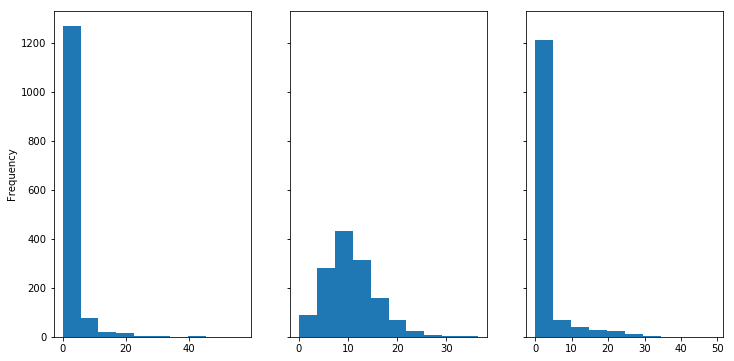

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

fig,axs = plt.subplots(1,3,sharey=True, figsize=(12,6))

# explore the distributions a bit...

mergedcont.walkers.plot(kind='hist',ax=axs[0])
mergedcont.carpoolers.plot(kind='hist', ax=axs[1])
mergedcont.pubtrans.plot(kind='hist', ax=axs[2])



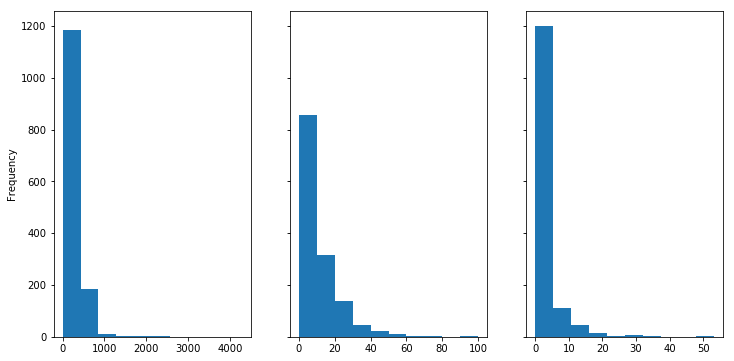

In [29]:

fig,axs = plt.subplots(1,3,sharey=True, figsize=(12,6))

# explore the distributions a bit...

mergedcont.male15_24.plot(kind='hist',ax=axs[0])
mergedcont.unenrolled_m1619.plot(kind='hist', ax=axs[1])
mergedcont.unemployed_m1619.plot(kind='hist', ax=axs[2])